In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
def lin_min(x,m,x0):
    return m*(x-x0)

d_LiF=201.4e-12
e=1.602176e-19
c=299792458
h_lit=6.626070e-34

angle0=np.arange(4.4,7.2,0.2)
rate0=np.array([26.4,29,33,72.8,116.8,145.2,180.8,199.2,203.4,235.8,243.2,249.2,258,249])
drate0=np.sqrt(rate0)

angle1=np.arange(8.4,9.5,0.1)
rate1=np.array([194.8,218.3,246.3,340.4,404.6,340.9,249.2,201.7,191.3,188.2,186.1])
drate1=np.sqrt(rate1)

angle2=np.arange(9.4,10.7,0.1)
rate2=np.array([186.1,193.1,221.2,268.1,541.1,921.2,900.5,585.9,256.1,187.4,165.4,159.3,149.3])
drate2=np.sqrt(rate2)

angle3=np.arange(17.5,18.5,0.1)
rate3=np.array([56.9,61.7,63.9,69.8,74.2,84.5,87,69.3,58.4,56.5])
drate3=np.sqrt(rate3)

angle4=np.arange(19.9,21.0,0.1)
rate4=np.array([56,61.4,74.4,95.5,150.8,179.5,149.5,89,60.4,47.9,47.1,45.7])
drate4=np.sqrt(rate4)

U_B=np.arange(20,36,1)
rate=np.array([0.9,1.95,2.9,12.65,30.3,50.05,65.6,79.25,94.75,110.4,132.7,140.3,158.4,170.1,189.3,205.3])
drate=np.sqrt(rate)/np.sqrt(20)

Minimaler Winkel: 4.6185151140074625°, Fehler 0.06275311619006317°
Minimale Wellenlänge: 3.2433870453884726e-11 m, Fehler 4.397335872011807e-13 m
Planck-Konstante: 6.066753383740269e-34 kV, Fehler 8.225213922248625e-36, Sigma-Abw. 6.800025161009116
Spektrum 2. Ord beginnt bei 9.267386149928917°, Fehler 0.12675314211396305°


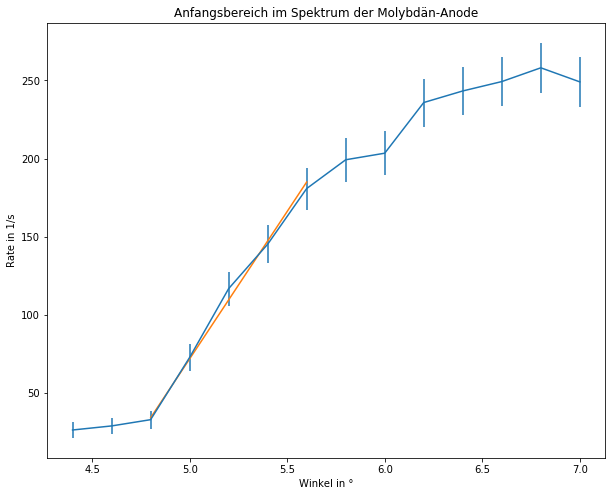

In [52]:
plt.figure(1, figsize=(10,8))
plt.title('Anfangsbereich im Spektrum der Molybdän-Anode')
plt.errorbar(angle0,rate0,yerr=drate0)
plt.xlabel('Winkel in °')
plt.ylabel('Rate in 1/s')

start=3
end=7
popt0,pcov0=curve_fit(lin_min,angle0[start-1:end],rate0[start-1:end], sigma=drate0[start-1:end])
plt.plot(angle0[start-1:end], lin_min(angle0[start-1:end],*popt0))
angle_min=popt0[1]
dangle_min=np.sqrt(pcov[1][1])
lambda_min0=2*d_LiF*np.sin(angle_min*np.pi/180)
dlambda_min0=2*d_LiF*np.pi/180*np.cos(angle_min*np.pi/180)*dangle_min
h1=e*35000*lambda_min0/c
dh1=e*35000*dlambda_min0/c
sigma_dev1=abs(h_lit-h1)/dh1
ord2angle=(180/np.pi)*np.arcsin(lambda_min0/d_LiF)
dord2angle=(180/np.pi)*(dlambda_min0/d_LiF)/np.sqrt(1-(lambda_min0/d_LiF)**2)

print("Minimaler Winkel: {}°, Fehler {}°".format(angle_min,dangle_min))
print("Minimale Wellenlänge: {} m, Fehler {} m".format(lambda_min0,dlambda_min0))
print("Planck-Konstante: {} kV, Fehler {}, Sigma-Abw. {}".format(h1,dh1,sigma_dev1))
print("Spektrum 2. Ord beginnt bei {}°, Fehler {}°".format(ord2angle,dord2angle))

Text(0,0.5,'Rate in 1/s')

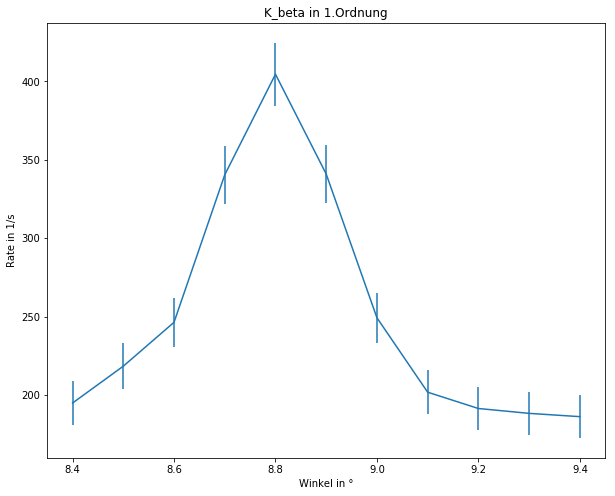

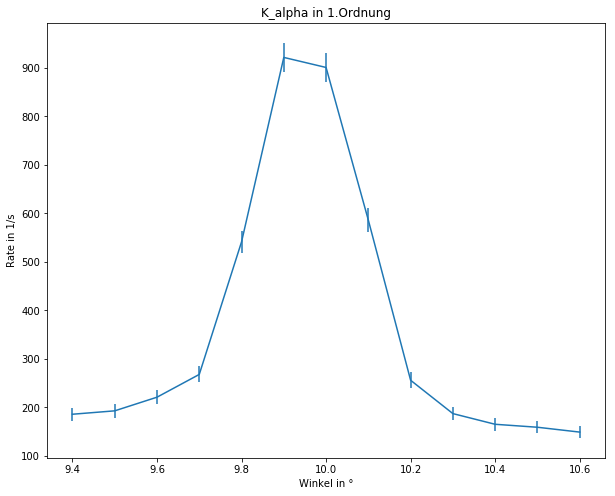

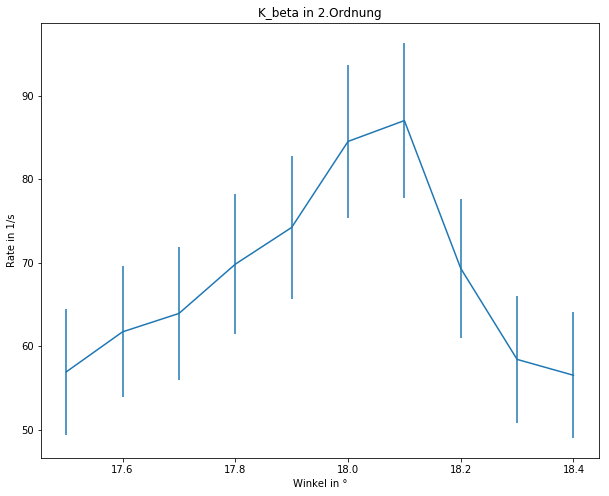

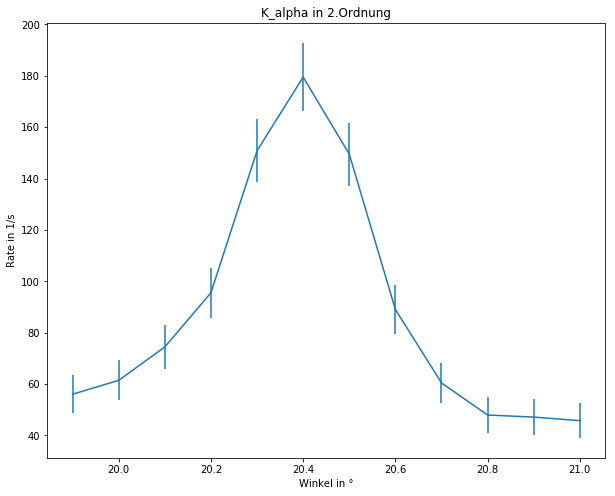

In [36]:
plt.figure(2, figsize=(10,8))
plt.title('K_beta in 1.Ordnung')
plt.errorbar(angle1,rate1,yerr=drate1)
plt.xlabel('Winkel in °')
plt.ylabel('Rate in 1/s')

plt.figure(3, figsize=(10,8))
plt.title('K_alpha in 1.Ordnung')
plt.errorbar(angle2,rate2,yerr=drate2)
plt.xlabel('Winkel in °')
plt.ylabel('Rate in 1/s')

plt.figure(4, figsize=(10,8))
plt.title('K_beta in 2.Ordnung')
plt.errorbar(angle3,rate3,yerr=drate3)
plt.xlabel('Winkel in °')
plt.ylabel('Rate in 1/s')

plt.figure(5, figsize=(10,8))
plt.title('K_alpha in 2.Ordnung')
plt.errorbar(angle4,rate4,yerr=drate4)
plt.xlabel('Winkel in °')
plt.ylabel('Rate in 1/s')

Einsatzspannung: 22.121898645481863 kV, Fehler 0.06275311619006317
Planck-Konstante: 6.215828848796232e-34 kV, Fehler 1.7632420987776392e-36, Sigma-Abw. 23.266297435171605


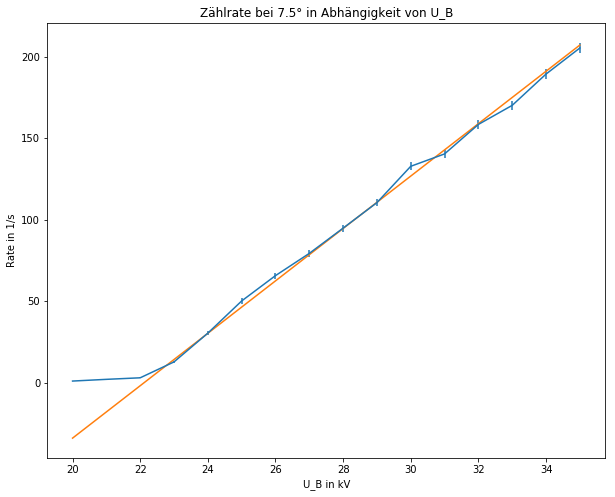

In [23]:
plt.figure(6, figsize=(10,8))
plt.title('Zählrate bei 7.5° in Abhängigkeit von U_B')
plt.errorbar(U_B,rate,yerr=drate)
plt.xlabel('U_B in kV')
plt.ylabel('Rate in 1/s')

popt,pcov=curve_fit(lin_min,U_B[3:],rate[3:], sigma=drate[3:])
plt.plot(U_B, lin_min(U_B,*popt))
U_ein=popt[1]
dU_ein=np.sqrt(pcov[1][1])
lambda_min=2*d_LiF*np.sin(7.5*np.pi/180)
h2=e*U_ein*1000*lambda_min/c
dh2=e*dU_ein*1000*lambda_min/c
sigma_dev2=abs(h_lit-h2)/dh2

print("Einsatzspannung: {} kV, Fehler {}".format(U_ein,dU_ein))
print("Planck-Konstante: {} kV, Fehler {}, Sigma-Abw. {}".format(h2,dh2,sigma_dev2))